In [1]:
# NAME: SHRUTHI PASUMARTHI
# STUDENT ID: 801218392
# HOMEWORK 1 QUESTION 3 A 

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#**** REGULARIZATION **********

In [4]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
m = len(housing)
m

545

In [6]:
housing.shape

(545, 13)

In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [8]:
df_test.shape

(109, 13)

In [9]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(5)

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_23612\3026418241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])


,area,bedrooms,bathrooms,stories,parking,price
542,0.124199,0.2,0.0,0.0,0.0,0.000000
496,0.150654,0.2,0.0,0.0,0.0,0.081818
484,0.083821,0.2,0.0,0.0,0.0,0.096970
507,0.122807,0.2,0.0,0.0,0.0,0.072727
252,0.558619,0.4,0.0,0.0,0.0,0.239394


In [11]:
trainl = len(df_Newtrain)
testl = len(df_Newtest)

In [12]:
df_Newtrain.shape

(436, 6)

In [13]:
x0 = df_Newtrain.values[:,0]
x1 = df_Newtrain.values[:,1]
x2 = df_Newtrain.values[:,2]
x3 = df_Newtrain.values[:,3]
x4 = df_Newtrain.values[:,4]

In [14]:
x0 = x0.reshape(trainl, 1) 
x1 = x1.reshape(trainl, 1) 
x2 = x2.reshape(trainl, 1) 
x3 = x3.reshape(trainl, 1) 
x4 = x4.reshape(trainl, 1)

y = df_Newtrain.values[:,5]
y = y.reshape(trainl,1)

In [15]:
x00 = np.ones((trainl,1))
X = np.hstack((x00, x0, x1, x2, x3, x4)) 

In [16]:
theta = np.zeros(6)
theta = theta.reshape(6,1)
theta.shape

(6, 1)

In [17]:
def compute_cost (X, y, theta):
    h = X.dot(theta)
    j = np.subtract(h, y)
    j2 = np.square(j)
    J = 1/(2*m) * np.sum(j2)
    
    return J

In [18]:
cost = compute_cost(X, y, theta)
print('The cost for the given values of theta are: ', cost)

The cost for the given values of theta are:  0.03841234407170959


In [19]:
# * * * VALIDATION * * *

In [20]:
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtest.head(5)

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_23612\1894299791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])


,area,bedrooms,bathrooms,stories,parking,price
239,0.203463,0.50,0.0,0.333333,0.333333,0.270000
113,0.690043,0.50,0.0,0.000000,0.666667,0.412667
325,0.156710,0.75,0.0,0.333333,0.000000,0.215000
66,1.000000,0.25,0.0,0.000000,0.333333,0.493333
479,0.174026,0.75,0.0,0.333333,0.000000,0.113333


In [21]:
y_test = df_Newtest['price']
x_test = df_Newtest[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
print(x_test.head(5))
print(y_test.head(5))

         area  bedrooms  bathrooms   stories   parking
239  0.203463      0.50        0.0  0.333333  0.333333
113  0.690043      0.50        0.0  0.000000  0.666667
325  0.156710      0.75        0.0  0.333333  0.000000
66   1.000000      0.25        0.0  0.000000  0.333333
479  0.174026      0.75        0.0  0.333333  0.000000
239    0.270000
113    0.412667
325    0.215000
66     0.493333
479    0.113333
Name: price, dtype: float64


In [22]:
yt = y_test.values

In [23]:
x0t = x_test.values[:,0]
x1t = x_test.values[:,1]
x2t = x_test.values[:,2]
x3t = x_test.values[:,3]
x4t = x_test.values[:,4]

In [24]:
x0t = x0t.reshape(testl, 1) 
x1t = x1t.reshape(testl, 1) 
x2t = x2t.reshape(testl, 1) 
x3t = x3t.reshape(testl, 1) 
x4t = x4t.reshape(testl, 1) 
yt = yt.reshape(testl,1)

In [25]:
x00t = np.ones((testl,1))
Xt = np.hstack((x00t, x0t, x1t, x2t, x3t, x4t)) 

In [26]:
theta = np.zeros(6)
theta = theta.reshape(6,1)

In [27]:
def gradient_descent(X, y, theta, alpha, iterations, Xt, yt, l): 
    cost_history = np.zeros(iterations) 
    Valcost_history = np.zeros(iterations)
    for i in range(iterations):
        #h = theta1.x1 + x0
        h = X.dot(theta) 
        #Loss = h-y
        j = np.subtract(h, y)
        #For the derivative of j wrt theta
        sum_delta = (alpha / m) * (X.transpose().dot(j) + (l* theta**2).sum()); 
        #Updating the new theta
        #theta = theta - sum_delta;
        theta = theta - alpha * (((1/m) * (j * X).sum()) + ((l/m) * theta));
        #Saving it in the history array
        cost_history[i] = compute_cost(X, y, theta)
        Valcost_history[i] = compute_cost(Xt, yt, theta)
        
    return theta, cost_history, Valcost_history

In [28]:
iterations = 15000; 
alpha = 0.01; 
l = 10; 

In [29]:
theta, cost_history, valcost_history= gradient_descent(X, y, theta, alpha, iterations, Xt, yt, l)
print("Final cost of theta: ", theta)
print('Cost_history: '), cost_history
print('ValCost_history: '), valcost_history

Final cost of theta:  [[0.11927289]
 [0.11927289]
 [0.11927289]
 [0.11927289]
 [0.11927289]
 [0.11927289]]
Cost_history: 
ValCost_history: 


(None,
 array([0.00983567, 0.00910927, 0.00844592, ..., 0.00130252, 0.00130252,
        0.00130252]))

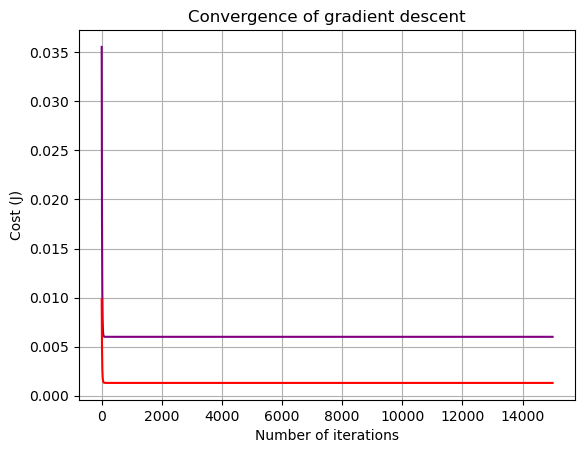

In [30]:
plt.plot(range(1, iterations + 1),cost_history, color='purple')
plt.plot(range(1, iterations + 1),valcost_history, color='red')

plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 
plt.show()